## Modelo Integra e Dispara

Trabalharemos com o modelo Integra e Dispara, cuja dinâmica é dada por:
    
$$\frac{dV}{dt} = \frac{(Er−V)+I}{τ}$$

Além da condição para o disparo de potenciais de ação: se V > Vlimiar, considera-se que foi emitido um PA,
e V é reiniciado a Vreset.

Descrevendo o comportamento qualitativo deste modelo:

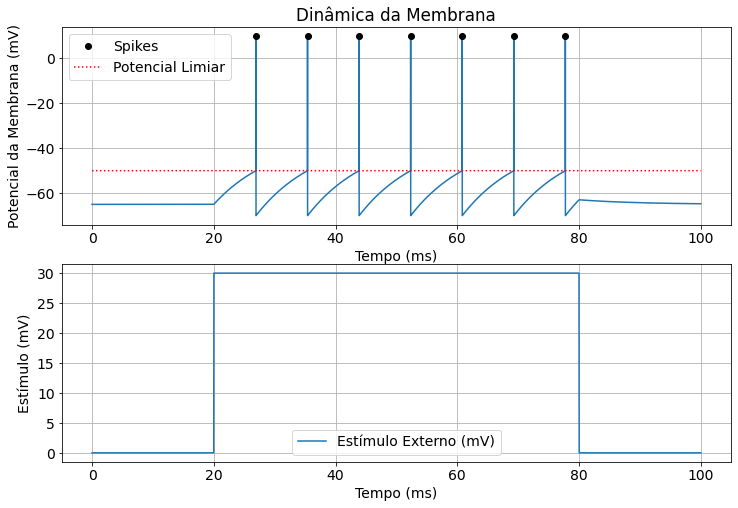

In [ ]:
import numpy as np
import math as m
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 14
import matplotlib.pyplot as p

# Funçao para o estimulo externo

def estimulo(t,t0,tf,I):
    est = (np.heaviside(t-t0,0.5) - np.heaviside(t-tf,0.5)) * I
    return est

#Dinamica integra e dispara

def din_id(V,Vr,tau,I):
    return ((Vr-V)+I)/tau

#método numérico

def int_disp(t0,tf,I = 10,tau=10):
    #parâmetros comuns

    Vr = -65       #potencial de repouso (mV)
    Vlim = -50     #limiar para o potencial de açao (mV)
    Vrst = -70     #potencial pós-potencial de açao (mV)


    passos = 10000           ##
    h = 0.01                 ###parametros de plotagem/integraçao
    t = np.arange(passos)*h  ##


    est = estimulo(t,t0,tf,I)  #estimulo externo (mV)

    spks = []  #lista para contagem de spikes


    V = np.zeros(passos)
    t = np.arange(passos)*h
    V[0] = Vr

    ### Metodo de Euler
    for i in range(passos - 1):

        V[i + 1] =  V[i] + (h * din_id(V[i],Vr,tau,est[i]))
        if V[i + 1] >= Vlim:
            V[i] = 10
            V[i +1] = Vrst
            spks.append(i)

    return t, V, est,spks,I



### PLOTANDO ###

p.subplot(211)
t,V,est,spks,I = int_disp(20,80,I=30)
p.plot(t,V)
p.plot(t[spks],V[spks],'ok', label='Spikes')
Vl = np.ones(len(t))*-50
p.plot(t,Vl,':r', label='Potencial Limiar')
p.title('Dinâmica da Membrana')
p.xlabel('Tempo (ms)')
p.ylabel('Potencial da Membrana (mV)')
p.grid()
p.legend()


p.subplot(212)
p.plot(t,est, label= 'Estímulo Externo (mV)')
p.xlabel('Tempo (ms)')
p.ylabel('Estímulo (mV)')
p.grid()
p.legend()
p.show()

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

### 1) Descreva o comportamento qualitativo deste modelo. Você pode utilizar simulações, soluções exatas, ou análise qualitativa da dinâmica (“flechas no espaço de estados”). Lembre-se de discutir não só o comportamento sublimiar, mas também o mecanismo de disparo de potenciais de ação. Sugestão: utilize gráficos, além de palavras!

O modelo integra e dispara, como apresentado em aula, é um modelo responsável pela medida de potencial de uma membrana de um neurônio afim de entender melhor a dinâmica dos disparos dele, integrando parâmetros variados: V (variável do potencial), Vr (potencial de repouso) e Tau que trabalha como um tempo (apesar de não ser medido em unidades de tempo) do decaimento do potencial elétrico para seu estado comum de equilíbrio. Como escrito no programa acima, temos também Vrst (pós-potencial de ação) e Vlim (limiar para o potencial de ação).

Tais parâmetros descrevem o funcionamento da dinâmica de disparo de um neurônio, o Vr serve como o pontencial de membrana "natural" de equilíbrio do neurônio, V é nossa variável experimental, caso coloquemos um V que resulte numa diferença de potencial acima do nosso Vlim (limiar para o potencial de de ação) um PA acontece, se o PA acontece nosso modelo reseta para uma condição Vrst que é de -70mV tal qual um neurônio clássico, essa condição é imposta para que o modelo possa se repetir como se estivesse acontecendo diversos disparos, nosso Tau então determina o decaimento para o Vr caso paremos de fazer com que o neurônio dispare.

A lógica por trás do Vlim deve-se aos processos de hiperpolarização e despolarização do neurônio, após um PA acontece uma hiperpolarização da célula que vai para um potencial abaixo do seu Vr, -70mV como definido no modelo, para depois voltar para o Vr -65mV como definido no modelo.


### 2) Explique (dissertativamente e graficamente) o que representa o parâmetro τ da dinâmica. Sugestão: simule o modelo variando o valor de τ, mas mantendo o estímulo (sublimiar) constante.

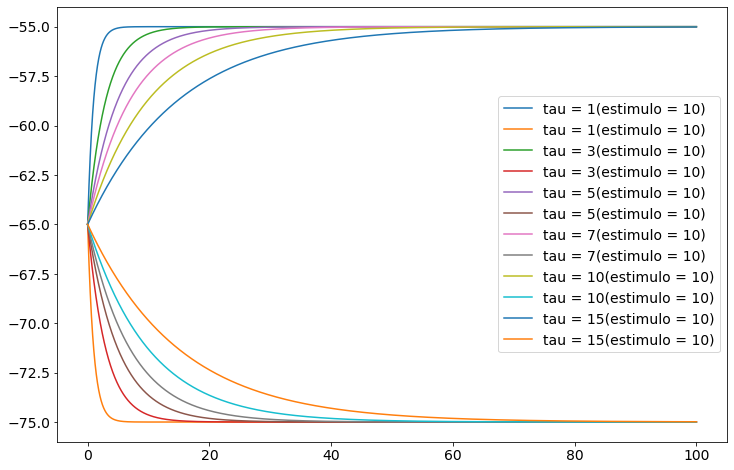

In [ ]:
## Variando tau

for i in [1,3,5,7,10,15]:
    t,V,est,spks,I = int_disp(0,100,I=10, tau = i)
    p.plot(t,V, label=f'tau = {i}(estimulo = {I})')
    t,V,est,spks,I = int_disp(0,100,I=-10, tau = i)
    p.plot(t,V, label=f'tau = {i}(estimulo = {-I})')
    p.legend()

Como observamos no gráfico acima, podemos ver que quanto maior o nosso Tau mais rápido é o decaimento para o equilíbrio, tendo como exemplo um Tau = 1 na parte de baixo do gráfico representado pela primeira linha laranja e um Tau = 10 representado pela linha azul clara também na parte de baixo do gráfico, o decaimento para o equilíbrio é bem mais rápido do laranja. Tau é visto como o produto da resistência de um resistor (R) da membrana (canal iônico, p. ex.) e C (Capacitor) que é a própria membrana.

$$\frac{dV}{dt} = \frac{(Er−V)+I}{τ}$$

Como vemos na equação acima do modelo, Tau fica na parte de baixo da equação, portanto faz sentido que quanto maior ele seja, mais demorado seja o decaimento, e quanto menor, mais rápido.

### 3) Com base na sua resposta anterior, discuta os diferentes efeitos de uma sequência de dois pulsos retangulares sobre o modelo. Apresente simulações para justificar sua resposta.

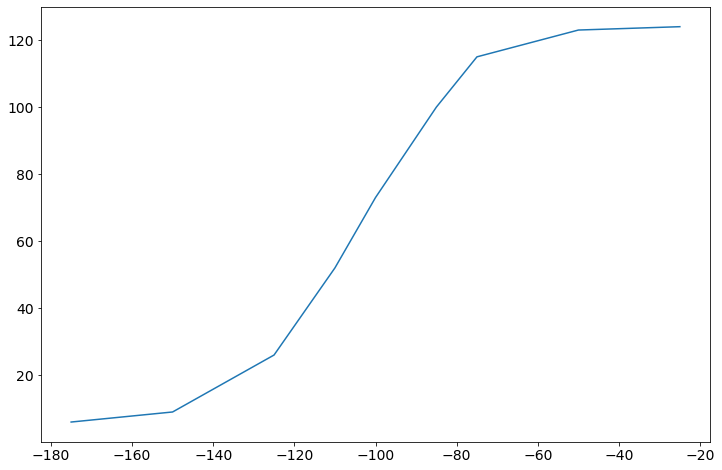

In [ ]:
x = [6,9,26,52,73,100,115,123,124]
y = [-175,-150,-125,-110,-100,-85,-75,-50,-25]

p.plot(y,x)

### 4) O que o valor V∞ = Er + I representa na dinâmica?

### Em eletrofisiologia, é comum utilizar curvas f-I para caracterizar neurônios. Estas curvas descrevem a taxa de disparo da célula ( no. de spikes ), em função do estímulo aplicado. tempo total

### 5) Construa a curva f-I para o modelo integra e dispara. Para tanto, você deve repetir a simulação várias vezes, variando o valor de I (escolha um pulso largo o suficiente para que I seja constante ao longo de toda a simulação) e armazenando o número de spikes. Compare a curva obtida com o resultado analítico:

$$
f(I) = \left (τ log\cfrac{V\infty - Vreset}{V\infty - Vlimiar}\right)^{-1}
$$

In [ ]:
def graf_fi(t0,tf,I):

  est = estimulo(t,t0,tf,I)
  s = np.zeros(len(est))

  for i in range(len(est)):
      t,V,est,spks,I = int_disp(t0,tf,e[i])
      s[i] = len(spks)/0.1  ## Hertz

  return est,s

est,s = graf_fi(10,50,30)
p.figure(1)
p.plot(est,s,'o')
p.title('Curva F-I')
p.xlabel('Estímulo (mV)')
p.ylabel('Taxa de disparos (Hz)')
p.grid()

### GRAFICO RESULTADO ANALITICO


def graf_fi_anlt(t0, tf, I):
    y = np.zeros(len(estim))
    s = np.zeros(len(estim))
    Vinf = np.zeros(len(estim))

    Vr = -65
    Vlim = -50
    Vrst = -70
    tau = 10

    passos = 10000
    h = 0.01
    t = np.arange(passos)*h

    est = estimulo(t,t0,tf,I)

    for i in range(len(est)):
        Vinf[i] = Vr + est[i]
        s[i] = est[i]
        y[i] = (1/(tau * np.log10((Vinf[i] - Vrst)/(Vinf[i] - Vlim))))/0.1


    return y,s

p.figure(2)
y,s = graf_fi_anlt(10,50,30)
p.plot(y,s,'o')
p.title('Curva F-I analítica')
p.xlabel('Estímulo (mV)')
p.ylabel('Taxa de disparos (Hz)')
p.grid()

UnboundLocalError: ignored